<a href="https://colab.research.google.com/github/faithNassiwa/ner-clinicaltrials-interventions/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install Packages
import requests
from pprint import pprint
import pandas as pd
import numpy as np

## Get Intervention Names from Clinical Trials(CT.GOV)

In [8]:
import requests, io
import pandas as pd
# Ref: https://www.lexjansen.com/phuse/2021/dh/PRE_DH01.pdf

# Send and retrieve HTTP (REST) request
url = 'https://clinicaltrials.gov/api/query/study_fields?expr=AREA[InterventionType]Drug&fields=NCTId,Condition,InterventionName,InterventionOtherName&min_rnk=1&max_rnk=100&fmt=csv'
res = requests.get(url).content
# Extract contents, skip CSV header (first 10 lines), to dataframe
data = pd.read_csv(io.StringIO(res.decode("utf-8")), skiprows=10).fillna(0)

In [9]:
# Export extracted data for future reference
data.to_csv('data.csv')

In [10]:
# peak at head
data.head(10)

,Rank,NCTId,Condition,InterventionName,InterventionOtherName
0,1,NCT06163170,Melanoma,Nivolumab +/- ipilimumab|Nivolumab,0
1,2,NCT06163040,Relapsed or Refractory Multiple Myeloma,Elotuzumab in combination with pomalidomide an...,0
2,3,NCT06162819,Migraine|Prophylaxis,Amitriptyline|Flunarizine 5mg,Amyline|Sibelium
3,4,NCT06162455,Nosocomial Pneumonia,Sham treatment|200- ppm NO,Oxygen-Air Mixture|Nitric Oxide
4,5,NCT06162286,Community-acquired Bacterial Pneumonia,Omadacycline|Moxifloxacin,0
5,6,NCT06161870,Severe Infection,individualized vancomycin dosing based on the ...,0
6,7,NCT06161844,Type 2 Diabetes Mellitus,semaglutide injection (HD1916)|Ozempic,0
7,8,NCT06161805,Endometriosis|Chronic Pelvic Pain Syndrome,Esketamine hydrochloride|Placebo,ketanest
8,9,NCT06161792,Hot Flashes|Breast Cancer,0.8 mg RCN3028|Placebo,0
9,10,NCT06161714,Pain,Articaine 4%/Epi 1:100000 Inj Cart 1.7Ml|Lidoc...,Septanest|Octocaine


## Preprocessing Intervention Names

In [11]:
import re
def clean_intervention_names(name):
  # split on | and +
  cleaned_names_list = re.split('[\||\+]', name)
  return cleaned_names_list

In [12]:
intervention_names_cleaned = []
for i in data['InterventionName']:
  # remove duplicates if they exist
  intervention_names_cleaned.append(clean_intervention_names(i))

print(len(intervention_names_cleaned))
print(intervention_names_cleaned)

100
[['Nivolumab ', '/- ipilimumab', 'Nivolumab'], ['Elotuzumab in combination with pomalidomide and dexamethasone', 'Elotuzumab in combination with lenalidomide and dexamethasone'], ['Amitriptyline', 'Flunarizine 5mg'], ['Sham treatment', '200- ppm NO'], ['Omadacycline', 'Moxifloxacin'], ['individualized vancomycin dosing based on the population pharmacokinetics (PK) model', 'empirical vancomycin dosing'], ['semaglutide injection (HD1916)', 'Ozempic'], ['Esketamine hydrochloride', 'Placebo'], ['0.8 mg RCN3028', 'Placebo'], ['Articaine 4%/Epi 1:100000 Inj Cart 1.7Ml', 'Lidocaine 2%/Epi 1:100000 Inj Cart 1.7Ml'], ['Efruxifermin', 'Placebo'], ['Sacituzumab govitecan', 'Atezolizumab'], ['ZEN003694', 'Niraparib'], ['Fluzoparib', 'Fluzoparib', 'Apatinib'], ['TQ-A3334 tablets', 'TQ-A3334 placebo tablets'], ['Phase 1 Part A - dose escalation TYRA-200 taken once daily by mouth in 28-day cycles', 'Phase 1 Part B - dose expansion TYRA-200 taken once daily by mouth in 28-day cycles'], ['Belantama

In [13]:
intervention_names_other_cleaned = []
for i in data['InterventionOtherName']:
  if i != 0:
    # remove duplicates if they exist
    intervention_names_other_cleaned.append(clean_intervention_names(i))
  else:
    intervention_names_other_cleaned.append(i)

print(len(intervention_names_other_cleaned))
print(intervention_names_other_cleaned)

100
[0, 0, ['Amyline', 'Sibelium'], ['Oxygen-Air Mixture', 'Nitric Oxide'], 0, 0, 0, ['ketanest'], 0, ['Septanest', 'Octocaine'], 0, 0, ['MK-4827', 'Zejula'], 0, 0, 0, ['GSK2857916', 'aOX40'], 0, ['Singletine（DC407）experimental group', 'Placebo group'], 0, 0, 0, 0, 0, 0, 0, ['Zyprexa', 'Clozaril'], 0, ['ABBV-181'], 0, ['Sprix'], 0, 0, 0, ['Vasopressor', 'Vasopressor'], ['Vasopressor', 'Vasopressor'], ['Vasopressor', 'Vasopressor'], ['Vasopressor', 'Vasopressor'], 0, 0, ['RC48, RC48-ADC', 'TUKYSA, ONT-380, ARRY-380'], 0, ['Traditional Chinese medicine', 'Strandard treatment'], ['QPX7831'], ['Dacogen', 'Venclyxto', 'Venclexta'], ['Tpoxx Tecovirimat', 'Oral placebo capsule'], ['Single arm', 'combinationarm', 'combinationarm'], 0, 0, 0, 0, ['Oral melatonin', 'Placebo'], ['Farxiga', 'Forxiga', 'Cellcept', 'Imuran'], ['cold cream', 'cold cream'], ['Disitamab Vedotin （RC48-ADC)'], 0, ['anastrazole', 'Tamoxifen Citrate', 'NOLVADEX', 'L phenylalanine mustard (P)', 'Fluorouracil (f)'], ['1', '0'

## Use BERN2 to get Drug Name Labels

In [79]:
# Extract drug names from intervention names using BERN2, these will be used as true labels
def extract_drug_name(text, url="http://bern2.korea.ac.kr/plain"):
    response = requests.post(url, json={'text': text})
    if response.status_code == 200:
      result = response.json()
      if len(result['annotations']) > 0:
        mentions = [annotation['mention'] for annotation in result['annotations'] if annotation['obj'] == 'drug']
        return mentions
      else:
        return 'No drug mentioned'
    else:
      return 'Request failed'

if __name__ == '__main__': #test
    text = "Aspirin can be used to reduce the risk of stroke and heart attack."
    pprint(extract_drug_name(text))

['Aspirin']


In [ ]:
bern2_drug_names = []
for i in data['InterventionName']:
  bern2_drug_names.append(extract_drug_name(i)) # stopped after 3 hours of run to be able to proceed after processing 78 rows

print(len(bern2_drug_names))
print(bern2_drug_names)

In [16]:
bern2_drug_names

[['Nivolumab', 'ipilimumab', 'Nivolumab'],
 ['pomalidomide', 'dexamethasone', 'lenalidomide', 'dexamethasone'],
 ['Amitriptyline', 'Flunarizine'],
 'Request failed',
 ['Omadacycline', 'Moxifloxacin'],
 ['vancomycin', 'vancomycin'],
 [],
 ['Esketamine hydrochloride'],
 ['RCN3028'],
 ['Articaine', 'Lidocaine'],
 ['Efruxifermin'],
 [],
 ['ZEN003694', 'Niraparib'],
 ['Fluzoparib', 'Fluzoparib', 'Apatinib'],
 ['TQ-A3334', 'TQ-A3334'],
 ['TYRA-200', 'TYRA-'],
 ['Belantamab', 'GSK3174998'],
 ['CC-42344'],
 ['Singletine'],
 ['Psilocybin', 'psilocybin'],
 [],
 'No drug mentioned',
 'Request failed',
 'Request failed',
 [],
 ['Pacritinib', 'Azacitidine'],
 ['Olanzapine', 'Clozapine'],
 'No drug mentioned',
 'Request failed',
 'No drug mentioned',
 ['ketorolac', 'diclofenac'],
 ['Surufatinib'],
 ['Elocta', 'Alprolix'],
 'Request failed',
 ['Norepinephrine', 'Phenylephrine'],
 ['Norepinephrine', 'Phenylephrine'],
 ['Norepinephrine', 'Phenylephrine'],
 ['Norepinephrine', 'Phenylephrine'],
 ['lenvat

In [17]:
len(bern2_drug_names)

78

In [22]:
dataset = {'intervention_names': data['InterventionName'][:78], 'processed_intervention_names': intervention_names_cleaned[:78], 'target': bern2_drug_names }
dataset

{'intervention_names': 0                    Nivolumab +/- ipilimumab|Nivolumab
 1     Elotuzumab in combination with pomalidomide an...
 2                         Amitriptyline|Flunarizine 5mg
 3                            Sham treatment|200- ppm NO
 4                             Omadacycline|Moxifloxacin
                             ...                        
 73                                Paracetamol|Ibuprofen
 74                                      AZD9550|Placebo
 75         Alpha Lipoic Acid 600 MG Oral Tablet|Placebo
 76                                   AGN-151586|Placebo
 77                 THYROX (Atlantic krill oil).|Placebo
 Name: InterventionName, Length: 78, dtype: object,
 'processed_intervention_names': [['Nivolumab ', '/- ipilimumab', 'Nivolumab'],
  ['Elotuzumab in combination with pomalidomide and dexamethasone',
   'Elotuzumab in combination with lenalidomide and dexamethasone'],
  ['Amitriptyline', 'Flunarizine 5mg'],
  ['Sham treatment', '200- ppm NO'],
  ['O

In [31]:
# Prepare dataset
dataset_df = pd.DataFrame(dataset)

# Remove rows where target == Request failed or []
dataset_df = dataset_df[dataset_df['target'] != 'Request failed']
dataset_df = dataset_df[dataset_df['target'].apply(lambda x: x != [])]
dataset_df.head(10)

,intervention_names,processed_intervention_names,target
0,Nivolumab +/- ipilimumab|Nivolumab,"[Nivolumab , /- ipilimumab, Nivolumab]","[Nivolumab, ipilimumab, Nivolumab]"
1,Elotuzumab in combination with pomalidomide an...,[Elotuzumab in combination with pomalidomide a...,"[pomalidomide, dexamethasone, lenalidomide, de..."
2,Amitriptyline|Flunarizine 5mg,"[Amitriptyline, Flunarizine 5mg]","[Amitriptyline, Flunarizine]"
4,Omadacycline|Moxifloxacin,"[Omadacycline, Moxifloxacin]","[Omadacycline, Moxifloxacin]"
5,individualized vancomycin dosing based on the ...,[individualized vancomycin dosing based on the...,"[vancomycin, vancomycin]"
7,Esketamine hydrochloride|Placebo,"[Esketamine hydrochloride, Placebo]",[Esketamine hydrochloride]
8,0.8 mg RCN3028|Placebo,"[0.8 mg RCN3028, Placebo]",[RCN3028]
9,Articaine 4%/Epi 1:100000 Inj Cart 1.7Ml|Lidoc...,"[Articaine 4%/Epi 1:100000 Inj Cart 1.7Ml, Lid...","[Articaine, Lidocaine]"
10,Efruxifermin|Placebo,"[Efruxifermin, Placebo]",[Efruxifermin]
12,ZEN003694|Niraparib,"[ZEN003694, Niraparib]","[ZEN003694, Niraparib]"


In [32]:
dataset_df.to_csv('dataset.csv')

In [80]:
# Extract drug names from intervention names using BERN2, these will be used as true labels
def extract_drug_name(text, url="http://bern2.korea.ac.kr/plain"):
    response = requests.post(url, json={'text': text})
    if response.status_code == 200:
      result = response.json()
      if len(result['annotations']) > 0:
        mentions = [annotation['mention'] for annotation in result['annotations'] if annotation['obj'] == 'drug']
        return result['annotations']
      else:
        return 'No drug mentioned'
    else:
      return 'Request failed'

if __name__ == '__main__': #test
    text = "Nivolumab +/- ipilimumab|Nivolumab"
    pprint(extract_drug_name(text))

[{'id': ['mesh:C029247'],
  'is_neural_normalized': True,
  'mention': 'Nivolumab',
  'obj': 'drug',
  'prob': 0.9360831379890442,
  'span': {'begin': 0, 'end': 9}},
 {'id': ['CHEBI:63604'],
  'is_neural_normalized': True,
  'mention': 'ipilimumab',
  'obj': 'drug',
  'prob': 0.5836290717124939,
  'span': {'begin': 14, 'end': 24}},
 {'id': ['mesh:C029247'],
  'is_neural_normalized': True,
  'mention': 'Nivolumab',
  'obj': 'drug',
  'prob': 0.9323698282241821,
  'span': {'begin': 25, 'end': 34}}]


## Text Classification

In [21]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.4 MB/s eta 0:00:00


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.metrics import f1_score, accuracy_score

In [2]:
# Mount google drive to access folder with data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_url = '/content/drive/MyDrive/CS6120/Project/Dataset/dataset.csv'
dataset_df = pd.read_csv(dataset_url)
dataset_df.head(10)

,Unnamed: 0,intervention_names,processed_intervention_names,bern_labels,drug_status
0,0,Nivolumab +/- ipilimumab|Nivolumab,"['Nivolumab ', '/- ipilimumab', 'Nivolumab']","['Nivolumab', 'ipilimumab', 'Nivolumab']",Drug
1,1,Elotuzumab in combination with pomalidomide an...,['Elotuzumab in combination with pomalidomide ...,"['pomalidomide', 'dexamethasone', 'lenalidomid...",Drug
2,2,Amitriptyline|Flunarizine 5mg,"['Amitriptyline', 'Flunarizine 5mg']","['Amitriptyline', 'Flunarizine']",Drug
3,4,Omadacycline|Moxifloxacin,"['Omadacycline', 'Moxifloxacin']","['Omadacycline', 'Moxifloxacin']",Drug
4,5,individualized vancomycin dosing based on the ...,['individualized vancomycin dosing based on th...,"['vancomycin', 'vancomycin']",Drug
5,7,Esketamine hydrochloride|Placebo,"['Esketamine hydrochloride', 'Placebo']",['Esketamine hydrochloride'],Drug
6,8,0.8 mg RCN3028|Placebo,"['0.8 mg RCN3028', 'Placebo']",['RCN3028'],Drug
7,9,Articaine 4%/Epi 1:100000 Inj Cart 1.7Ml|Lidoc...,"['Articaine 4%/Epi 1:100000 Inj Cart 1.7Ml', '...","['Articaine', 'Lidocaine']",Drug
8,10,Efruxifermin|Placebo,"['Efruxifermin', 'Placebo']",['Efruxifermin'],Drug
9,12,ZEN003694|Niraparib,"['ZEN003694', 'Niraparib']","['ZEN003694', 'Niraparib']",Drug


<Axes: >

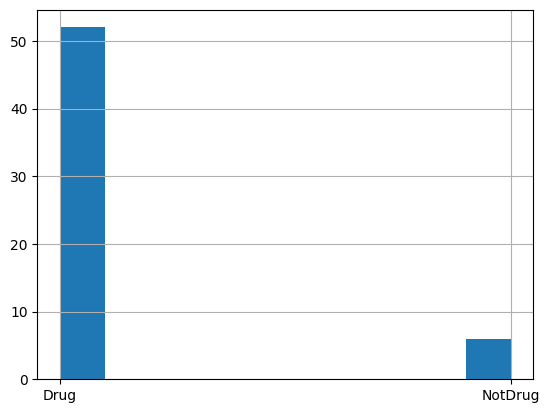

In [6]:
dataset_df['drug_status'].hist()

In [7]:
drug_status_mapping = {'Drug': 0, 'NotDrug': 1}
dataset_df['drug_status'] = dataset_df['drug_status'].map(drug_status_mapping)

In [8]:
# Renamining column as required to have a label column
df2 = dataset_df[['intervention_names', 'drug_status']]
df2.columns = ['intervention_names', 'labels']
df2.to_csv('dataset.csv', index=False)

In [9]:
!pip install datasets
from datasets import load_dataset

# Load CSV as HuggingFace Dataset
raw_dataset = load_dataset('csv', data_files='dataset.csv')
raw_dataset

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['intervention_names', 'labels'],
        num_rows: 58
    })
})

In [10]:
split = raw_dataset['train'].train_test_split(test_size=0.2, seed = 42)
split

DatasetDict({
    train: Dataset({
        features: ['intervention_names', 'labels'],
        num_rows: 46
    })
    test: Dataset({
        features: ['intervention_names', 'labels'],
        num_rows: 12
    })
})

In [11]:
# Set tokenizer object passing in checkpoint
checkpoint = "dmis-lab/biobert-base-cased-v1.1"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [12]:
# Tokenizer function to do truncation , padding done automatically by trainer
def tokenize_function(batch):
    return tokenizer(batch["intervention_names"], truncation=True)

In [13]:
# Apply tokenizer to train test split using map method
tokenize_dataset = split.map(tokenize_function, batched=True)
tokenize_dataset

Map:   0%|          | 0/46 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/12 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['intervention_names', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 46
    })
    test: Dataset({
        features: ['intervention_names', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12
    })
})

In [14]:
# Load mode from checkpoint
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
!pip install torchinfo
from torchinfo import summary

In [16]:
summary(model)

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           1,538
Total params: 10

In [17]:
# Create training args object
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64)

In [18]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions==labels)
  f1 = f1_score(labels, predictions, average='macro')
  return {'accuracy': acc, 'f1': f1}

In [19]:
# Build trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenize_dataset['train'],
    eval_dataset=tokenize_dataset['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [20]:
# Start training process
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.389551,0.916667,0.478261
2,No log,0.292293,0.916667,0.478261
3,No log,0.274384,0.916667,0.478261
4,No log,0.259776,0.916667,0.478261
5,No log,0.256169,0.916667,0.478261


TrainOutput(global_step=15, training_loss=0.3908354123433431, metrics={'train_runtime': 190.5126, 'train_samples_per_second': 1.207, 'train_steps_per_second': 0.079, 'total_flos': 4615749021960.0, 'train_loss': 0.3908354123433431, 'epoch': 5.0})

In [21]:
!ls ./results

checkpoint-12  checkpoint-15  checkpoint-3  checkpoint-6  checkpoint-9	runs


In [22]:
from transformers import pipeline

In [23]:
savedmodel = pipeline(task='text-classification', model='./results/checkpoint-9')

In [24]:
split['test']

Dataset({
    features: ['intervention_names', 'labels'],
    num_rows: 12
})

In [25]:
test_pred = savedmodel(split['test']['intervention_names'])

In [26]:
test_pred

[{'label': 'LABEL_0', 'score': 0.9259425401687622},
 {'label': 'LABEL_0', 'score': 0.9162322878837585},
 {'label': 'LABEL_0', 'score': 0.9292208552360535},
 {'label': 'LABEL_0', 'score': 0.8428515195846558},
 {'label': 'LABEL_0', 'score': 0.9305948615074158},
 {'label': 'LABEL_0', 'score': 0.8942419290542603},
 {'label': 'LABEL_0', 'score': 0.9259425401687622},
 {'label': 'LABEL_0', 'score': 0.929412841796875},
 {'label': 'LABEL_0', 'score': 0.8954777121543884},
 {'label': 'LABEL_0', 'score': 0.911907434463501},
 {'label': 'LABEL_0', 'score': 0.8935947418212891},
 {'label': 'LABEL_0', 'score': 0.9048320055007935}]

In [28]:
def get_labels(d):
  return int(d['label'].split(sep='_')[1])

test_pred = [get_labels(d) for d in test_pred]

In [29]:
test_pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
# Get accuracy of predictions
print("acc:", accuracy_score(split['test']['labels'], test_pred))

acc: 0.9166666666666666


In [31]:
# Get f1 score
print("f1:", f1_score(split['test']['labels'], test_pred, average='macro'))

f1: 0.4782608695652174


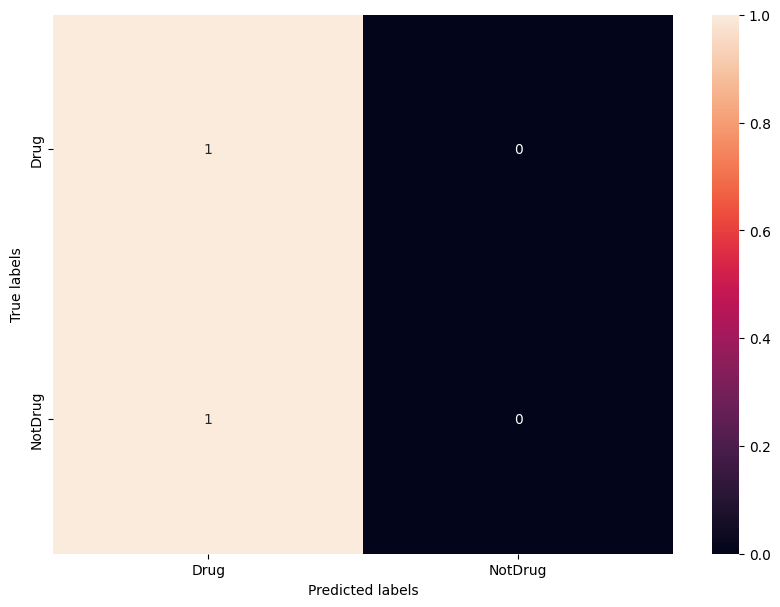

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
  classes =  ['Drug', 'NotDrug']
  df_cm = pd.DataFrame(cm, index = classes, columns = [classes])
  plt.figure(figsize = (10,7))
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')

cm = confusion_matrix(split['test']['labels'], test_pred, normalize='true')
plot_confusion_matrix(cm)